In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from scipy.stats import beta
import scipy as sp

dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z')

plt.rcParams.update({"text.usetex": True, 'font.size': 18, 'font.family': 'serif', "figure.figsize": [12, 7]})


def cdf(series: pd.Series) -> pd.DataFrame:
    """ calculates the cumulative distribution function of the given series"""
    return pd.DataFrame.from_dict({
        series.name: np.append(series.sort_values(), series.max()),
        "cdf": np.linspace(0, 1, len(series) + 1)
    })

In [30]:
df = pd.read_csv("data6.logs.csv", header=None, parse_dates=[0], date_parser=dateparse)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2022-04-21 21:14:02.153868+02:00,0.000043,0.000082,0.000183,0.000294,0.000378,0.000417,0.000419,0.000445,0.000513,...,0.000691,0.000784,0.000808,0.000814,0.000896,0.000915,0.000920,0.000959,0.001144,0.001176
1,2022-04-21 21:14:08.673206+02:00,0.000011,0.000127,0.000278,0.000292,0.000292,0.000304,0.000329,0.000345,0.000361,...,0.000394,0.000402,0.000408,0.000426,0.000504,0.000519,0.000542,0.000568,0.000571,0.000596
2,2022-04-21 21:14:41.604142+02:00,0.000117,0.000121,0.000243,0.000303,0.000324,0.000328,0.000390,0.000461,0.000474,...,0.000626,0.000655,0.000673,0.000703,0.000772,0.000803,0.000897,0.001025,0.001064,0.001133
3,2022-04-21 21:14:47.346938+02:00,0.000144,0.000246,0.000254,0.000256,0.000349,0.000401,0.000461,0.000487,0.000537,...,0.000551,0.000583,0.000613,0.000622,0.000696,0.000715,0.000792,0.000817,0.000864,0.000946
4,2022-04-21 21:14:51.251593+02:00,0.000052,0.000089,0.000109,0.000154,0.000188,0.000191,0.000320,0.000344,0.000431,...,0.000521,0.000567,0.000661,0.000668,0.000670,0.000671,0.000732,0.000920,0.000979,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2022-04-22 00:14:03.211784+02:00,0.003146,0.003232,0.003409,0.003637,0.003769,0.003796,0.003801,0.003854,0.004649,...,0.004915,0.005110,0.005120,0.005283,0.005283,0.005303,0.005305,0.005307,0.005337,0.005383
165,2022-04-22 00:14:13.221501+02:00,0.576358,0.576556,0.576698,0.576721,0.576727,0.576732,0.576822,0.576832,0.576888,...,0.626188,0.628991,0.629034,0.629098,0.629177,0.629199,0.629249,0.629388,0.629445,0.629500
166,2022-04-22 00:14:23.229922+02:00,0.141116,0.141432,0.143491,0.147510,0.148593,0.148708,0.148797,0.148998,0.149120,...,0.149334,0.149357,0.149370,0.149652,0.149903,0.154804,0.381483,0.418636,0.419747,0.420624
167,2022-04-22 00:14:33.238252+02:00,0.127189,0.127239,0.127320,0.127499,0.127587,0.127842,0.127853,0.137581,0.138078,...,0.143091,0.143551,0.149669,0.151492,0.151618,0.153393,0.153498,0.154569,0.155267,0.155275


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2022-04-21 21:14:02.153868+02:00,0.000043,0.000082,0.000183,0.000294,0.000378,0.000417,0.000419,0.000445,0.000513,...,0.000691,0.000784,0.000808,0.000814,0.000896,0.000915,0.000920,0.000959,0.001144,0.001176
1,2022-04-21 21:14:08.673206+02:00,0.000011,0.000127,0.000278,0.000292,0.000292,0.000304,0.000329,0.000345,0.000361,...,0.000394,0.000402,0.000408,0.000426,0.000504,0.000519,0.000542,0.000568,0.000571,0.000596
2,2022-04-21 21:14:41.604142+02:00,0.000117,0.000121,0.000243,0.000303,0.000324,0.000328,0.000390,0.000461,0.000474,...,0.000626,0.000655,0.000673,0.000703,0.000772,0.000803,0.000897,0.001025,0.001064,0.001133
3,2022-04-21 21:14:47.346938+02:00,0.000144,0.000246,0.000254,0.000256,0.000349,0.000401,0.000461,0.000487,0.000537,...,0.000551,0.000583,0.000613,0.000622,0.000696,0.000715,0.000792,0.000817,0.000864,0.000946
4,2022-04-21 21:14:51.251593+02:00,0.000052,0.000089,0.000109,0.000154,0.000188,0.000191,0.000320,0.000344,0.000431,...,0.000521,0.000567,0.000661,0.000668,0.000670,0.000671,0.000732,0.000920,0.000979,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-04-21 22:56:49.498765+02:00,0.000120,0.000144,0.000229,0.000260,0.000319,0.000358,0.000474,0.000510,0.000697,...,0.000740,0.000777,0.000833,0.000851,0.000867,0.000966,0.000995,0.001020,0.001034,0.001081
106,2022-04-21 22:56:50.010359+02:00,0.000023,0.000092,0.000231,0.000365,0.000396,0.000429,0.000481,0.000569,0.000589,...,0.000735,0.000850,0.000862,0.000886,0.000953,0.000965,0.001023,0.001126,0.001131,0.001148
107,2022-04-21 22:56:50.522205+02:00,0.000029,0.000098,0.000134,0.000245,0.000373,0.000427,0.000459,0.000510,0.000529,...,0.000737,0.000851,0.000868,0.000878,0.000945,0.000967,0.001052,0.001125,0.001172,0.001187
108,2022-04-21 23:04:09.581980+02:00,0.000043,0.000082,0.000183,0.000294,0.000378,0.000417,0.000445,0.000513,0.000523,...,0.000784,0.000808,0.000896,0.000915,0.000920,0.000959,0.001095,0.001144,0.001176,0.001205


In [42]:
df_filtered = df[(df[0] - dateparse('2022-04-21T21:14:02.153868+02:00')) < datetime.timedelta(hours=2)]
df_filtered

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2022-04-21 21:14:02.153868+02:00,0.000043,0.000082,0.000183,0.000294,0.000378,0.000417,0.000419,0.000445,0.000513,...,0.000691,0.000784,0.000808,0.000814,0.000896,0.000915,0.000920,0.000959,0.001144,0.001176
1,2022-04-21 21:14:08.673206+02:00,0.000011,0.000127,0.000278,0.000292,0.000292,0.000304,0.000329,0.000345,0.000361,...,0.000394,0.000402,0.000408,0.000426,0.000504,0.000519,0.000542,0.000568,0.000571,0.000596
2,2022-04-21 21:14:41.604142+02:00,0.000117,0.000121,0.000243,0.000303,0.000324,0.000328,0.000390,0.000461,0.000474,...,0.000626,0.000655,0.000673,0.000703,0.000772,0.000803,0.000897,0.001025,0.001064,0.001133
3,2022-04-21 21:14:47.346938+02:00,0.000144,0.000246,0.000254,0.000256,0.000349,0.000401,0.000461,0.000487,0.000537,...,0.000551,0.000583,0.000613,0.000622,0.000696,0.000715,0.000792,0.000817,0.000864,0.000946
4,2022-04-21 21:14:51.251593+02:00,0.000052,0.000089,0.000109,0.000154,0.000188,0.000191,0.000320,0.000344,0.000431,...,0.000521,0.000567,0.000661,0.000668,0.000670,0.000671,0.000732,0.000920,0.000979,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-04-21 22:56:49.498765+02:00,0.000120,0.000144,0.000229,0.000260,0.000319,0.000358,0.000474,0.000510,0.000697,...,0.000740,0.000777,0.000833,0.000851,0.000867,0.000966,0.000995,0.001020,0.001034,0.001081
106,2022-04-21 22:56:50.010359+02:00,0.000023,0.000092,0.000231,0.000365,0.000396,0.000429,0.000481,0.000569,0.000589,...,0.000735,0.000850,0.000862,0.000886,0.000953,0.000965,0.001023,0.001126,0.001131,0.001148
107,2022-04-21 22:56:50.522205+02:00,0.000029,0.000098,0.000134,0.000245,0.000373,0.000427,0.000459,0.000510,0.000529,...,0.000737,0.000851,0.000868,0.000878,0.000945,0.000967,0.001052,0.001125,0.001172,0.001187
108,2022-04-21 23:04:09.581980+02:00,0.000043,0.000082,0.000183,0.000294,0.000378,0.000417,0.000445,0.000513,0.000523,...,0.000784,0.000808,0.000896,0.000915,0.000920,0.000959,0.001095,0.001144,0.001176,0.001205


In [45]:
df_filtered.iloc[:, 1:].mean()

1     0.000054
2     0.000109
3     0.000168
4     0.000246
5     0.000317
6     0.000363
7     0.000412
8     0.000468
9     0.000528
10    0.000587
11    0.000658
12    0.000730
13    0.000792
14    0.000840
15    0.000896
16    0.000942
17    0.000996
18    0.001066
19    0.001136
20    0.001198
dtype: float64

Text(0, 0.5, 'Mean Distance')

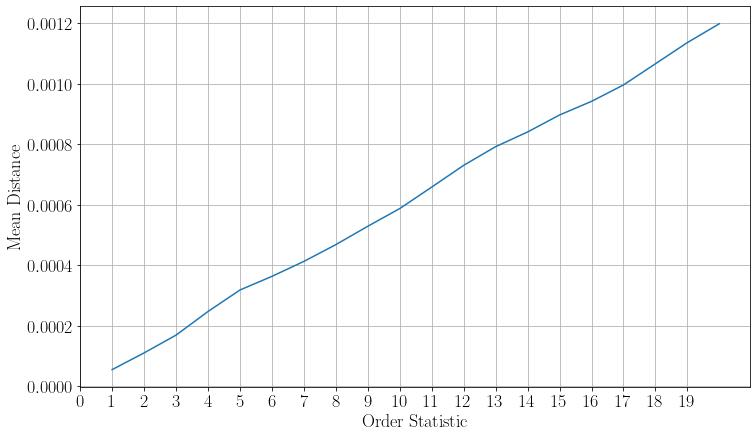

In [52]:
fig, ax = plt.subplots()

xs = np.arange(0, 20, step=1)
ax.plot(xs + 1, df_filtered.iloc[:, 1:].mean());
ax.grid();
ax.set_xticks(xs)
ax.set_xlabel("Order Statistic");
ax.set_ylabel("Mean Distance")

Text(0, 0.5, 'Mean Distance')

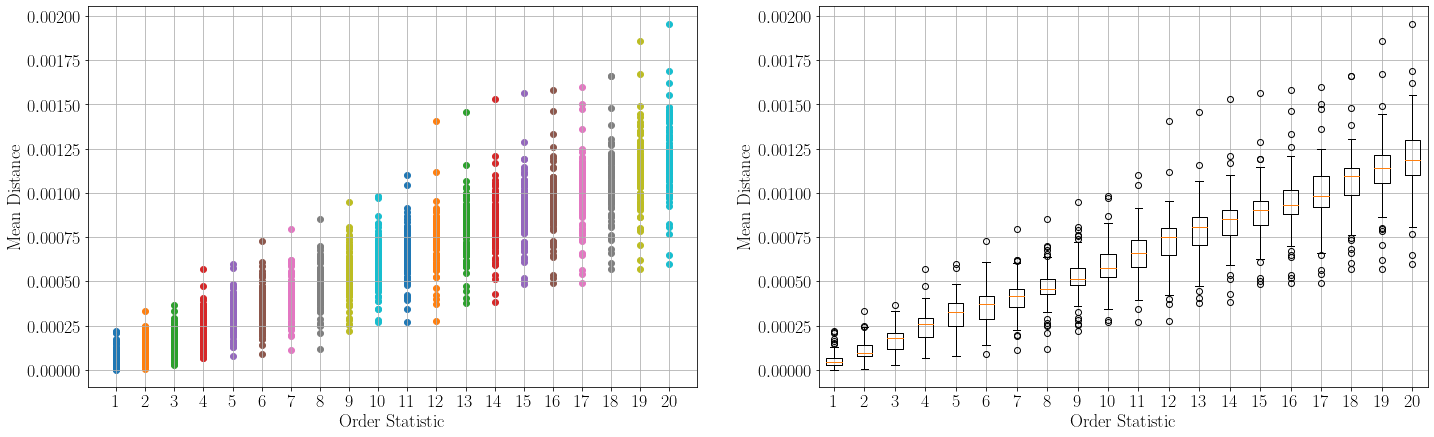

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[24, 7])

for i in range(20):
    ys = df_filtered[i + 1]
    ax1.scatter([i] * len(ys), ys)
xs = np.arange(1, 21, step=1)
ax1.set_xticks(xs - 1);
ax1.set_xticklabels(xs), ax1.grid();
ax1.set_xlabel("Order Statistic");
ax1.set_ylabel("Mean Distance")

ax2.boxplot(df_filtered.iloc[:, 1:])
ax2.grid();
ax2.set_xlabel("Order Statistic");
ax2.set_ylabel("Mean Distance")

In [186]:
xs = []
ys = []
for i in range(0, 20):
    for j in range(len(df_filtered.iloc[:,i+1])):
        xs += [i + 1]
        ys += [df_filtered.iloc[j, (i+1)]]
# z, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
# print("z=", z)
# print("residuals=", residuals)
# print("rank=", rank)
# print("singular_values=", singular_values)
# print("rcond=",rcond)

with open("test_data.csv", "w") as f:
    for i in range(len(xs)):
        f.write(f"{xs[i]},{ys[i]}\n")


xs = np.array(xs)
ys = np.array(ys)
coeff = np.transpose([xs * xs, xs])
np.linalg.lstsq(coeff, ys)

/var/folders/85/kr9hwsvd1y1gx1b__cbtxrxm0000gn/T/ipykernel_1365/445574014.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(coeff, ys)


(array([-1.25576961e-08,  5.97765488e-05]),
 array([3.83229763e-05]),
 2,
 array([8932.4890501 ,  139.99774913]))

In [174]:
# Linear fit
xySum = 0
x2Sum = 0
for i in range(len(xs)):
    xySum += xs[i] * ys[i]
    x2Sum += xs[i] * xs[i]

xySum / x2Sum

4.4218483365853646e-05

In [145]:
def linear_fit(x, a):
    return a * x


popt, pcov = sp.optimize.curve_fit(linear_fit, np.arange(1, 21, step=1), df_filtered.iloc[:, 1:].mean(),
                                   sigma=2 * df_filtered.iloc[:, 1:].std(), absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
popt, pcov, perr

(array([5.9515256e-05]), array([[3.14682073e-11]]), array([5.60965305e-06]))

Text(0, 0.5, 'Mean Distance')

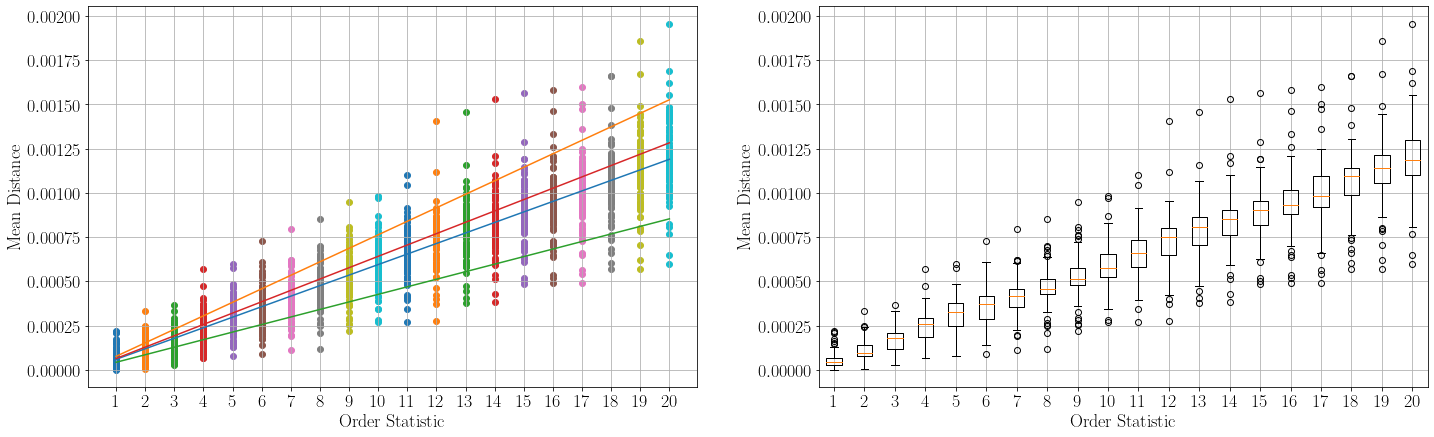

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[24, 7])

for i in range(20):
    ys = df_filtered[i + 1]
    ax1.scatter([i] * len(ys), ys)
xs = np.arange(1, 21, step=1)
ax1.plot(xs - 1, linear_fit(xs, popt[0]))
ax1.plot(xs - 1, linear_fit(xs, popt[0] + 3 * perr[0]))
ax1.plot(xs - 1, linear_fit(xs, popt[0] - 3 * perr[0]))
ax1.plot(xs - 1, xs * xySum / x2Sum)
ax1.set_xticks(xs - 1);
ax1.set_xticklabels(xs), ax1.grid();
ax1.set_xlabel("Order Statistic");
ax1.set_ylabel("Mean Distance")

ax2.boxplot(df_filtered.iloc[:, 1:])
ax2.grid();
ax2.set_xlabel("Order Statistic");
ax2.set_ylabel("Mean Distance")

In [131]:
network_size = 1 / popt[0] - 1
print("Network", network_size)
error = perr[0] / (popt[0] ** 2)
print("Error", error)

Network 16801.414486442733
Error 1583.7236017538742


In [141]:
estimates = []
for i in range(0, 20):
    for j in range(len(df_filtered.iloc[i, 1:])):
        estimates += [(i + 1) / df_filtered.iloc[i, j + 1] - 1]
np.median(np.array(estimates))

17630.939148989542

In [132]:
p, cov = np.polyfit(xs + 1, df_dists.mean(), 1, cov=True)
print("slope:", p[0])
print("err:", np.sqrt(np.diag(cov))[0])

slope: 0.9923029424186928
err: 0.00034183109868204475


/var/folders/85/kr9hwsvd1y1gx1b__cbtxrxm0000gn/T/ipykernel_1365/2037381386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p, cov = np.polyfit(xs + 1, df_dists.mean(), 1, cov=True)


In [28]:
print("Size: ", 1 / p[0] - 1)
print("Error: ", np.sqrt(np.diag(cov))[0] / (p[0] * p[0]))

Size:  21221.19433382584
Error:  97.0261944626538


In [20]:
np.mean((np.indices([20]) + 1) / np.array(df_dists.mean()) - 1), np.std(
    (np.indices([20]) + 1) / np.array(df_dists.mean()) - 1)

(22164.515147030106, 765.0589060353522)

In [ ]:
fig, ax = plt.subplots()
for k in range(3, 4):
    ax.hist(df[k], density=True, alpha=0.6, bins=100)

In [118]:
t = 5
df_flat = pd.concat([df.iloc[:, t:][col] for col in df.iloc[:, t:]], ignore_index=True)

In [119]:
df_flat.mean(), df_flat.std(), df_flat.median(), df_flat.mad()

(24512.73193137255, 7198.2835666896235, 24073.13, 5739.8124150903495)

<AxesSubplot:>

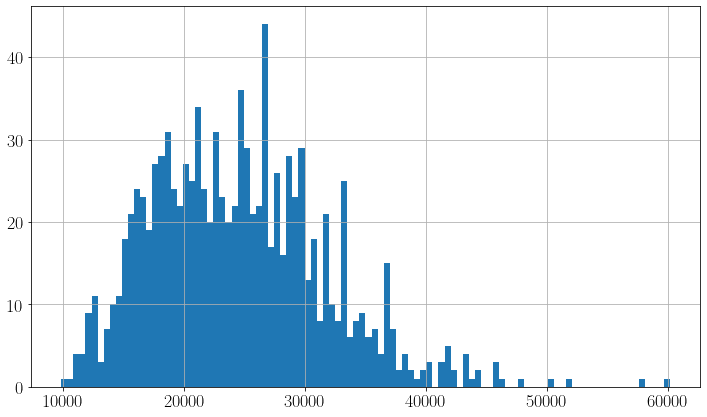

In [121]:
df_flat.hist(bins=100)

In [240]:
N = 17_000
K = 20

estimates = []
all = []
for i in range(10_000):
    vals = []
    for k in range(1, K + 1):
        vals += [np.random.beta(a=k, b=N - k + 1)]
    vals = np.sort(vals)
    all += [vals]
    es = []
    for j in range(1, K + 1):
        es += [(j / vals[j - 1]) - 1]

    estimates += [es]
df_num = pd.DataFrame(estimates)
df_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9708.997226,12965.759138,12909.438611,16831.894681,19053.420212,19967.209596,22677.357457,24148.495774,20576.215992,21355.781501,23234.047611,17632.129701,17612.993315,18354.971184,18035.246089,19229.478623,15895.180464,14715.153907,14991.023688,15427.309995
1,33239.830343,18212.237406,17405.353604,22058.051920,21101.596236,13974.695174,16193.224208,16718.379833,16663.766197,18133.238255,19784.289385,20051.818711,19307.522259,19281.325438,20325.477928,17626.065092,17157.882514,16348.127481,15191.644021,15475.582740
2,508310.552244,16498.610735,24599.006697,24753.737226,16689.835570,15264.777202,16278.110016,18357.505183,16444.575833,16521.366424,17464.713951,17312.023463,17912.338870,16326.996862,16045.247777,17024.399368,17466.105657,12065.540344,12092.834190,12478.268073
3,36591.751010,13655.365500,17894.986768,16424.246722,20169.136837,22400.637290,24551.195985,18555.475833,17685.390736,18018.286313,17699.622890,17679.768881,18054.905149,13699.942751,14379.338996,14579.256826,15210.741497,14939.392518,12638.039289,9486.114778
4,17906.655892,19880.319633,15732.574685,20374.452119,24007.683649,16106.957940,17413.890404,17667.020737,18743.881104,19615.496816,15936.965666,17155.779027,17649.735587,17686.300423,17809.380879,16468.806073,15148.204831,15700.953395,14276.989944,14465.170553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,56460.372698,16642.532155,22222.523440,16983.217786,18706.582657,19697.239833,15711.355803,16094.218225,16238.033061,17734.619488,17821.263570,17386.443327,18534.402370,16644.481167,17240.699778,17617.265606,17655.345618,18325.349282,15997.621657,14729.600458
9996,38939.587137,30031.078888,24261.491828,30058.158656,15839.988409,17000.787312,16968.106159,18810.771535,17752.436295,18499.689371,16413.168168,16114.758322,15900.659614,16969.350525,16354.287611,16830.149630,15416.461815,14224.689234,14384.961292,13083.542194
9997,35633.627811,27801.320412,14344.747529,16210.503234,18228.745572,20608.501535,20923.566676,17563.046166,17334.845080,18558.279592,17456.303629,17728.155614,15769.822192,16973.238036,14637.216895,13611.790057,13763.827307,14532.855336,15108.337650,14907.548159
9998,26836.079869,13820.913131,18721.598990,21913.207027,21797.335026,25267.391418,23154.387663,23791.988589,18427.023283,18618.567883,15518.207003,16178.790437,15938.033206,15190.385213,15963.347447,16480.082274,15086.792001,14744.764750,15389.613202,13893.044773


0     197834.362622
1      27944.414018
2      22547.851820
3      20604.556075
4      19688.312783
5      19104.174502
6      18755.219284
7      18493.686886
8      18311.222908
9      18172.783068
10     18040.843905
11     17925.770442
12     17801.053732
13     17672.703859
14     17509.098261
15     17311.756490
16     17009.876978
17     16596.423621
18     15909.139833
19     14593.031504
dtype: float64

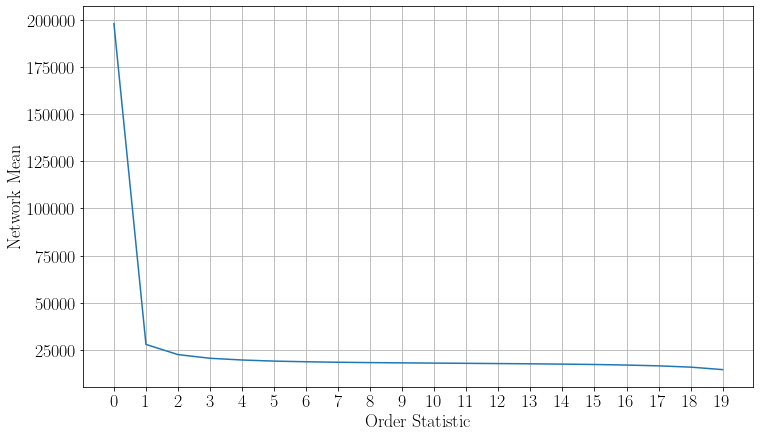

In [241]:
fig, ax = plt.subplots()

xs = np.arange(0, K, step=1)
ax.plot(xs, df_num.mean());
ax.grid();
ax.set_xticks(xs)
ax.set_xlabel("Order Statistic");
ax.set_ylabel("Network Mean")
df_num.mean()

In [183]:
all = np.array(all)

(-0.0001, 0.002)

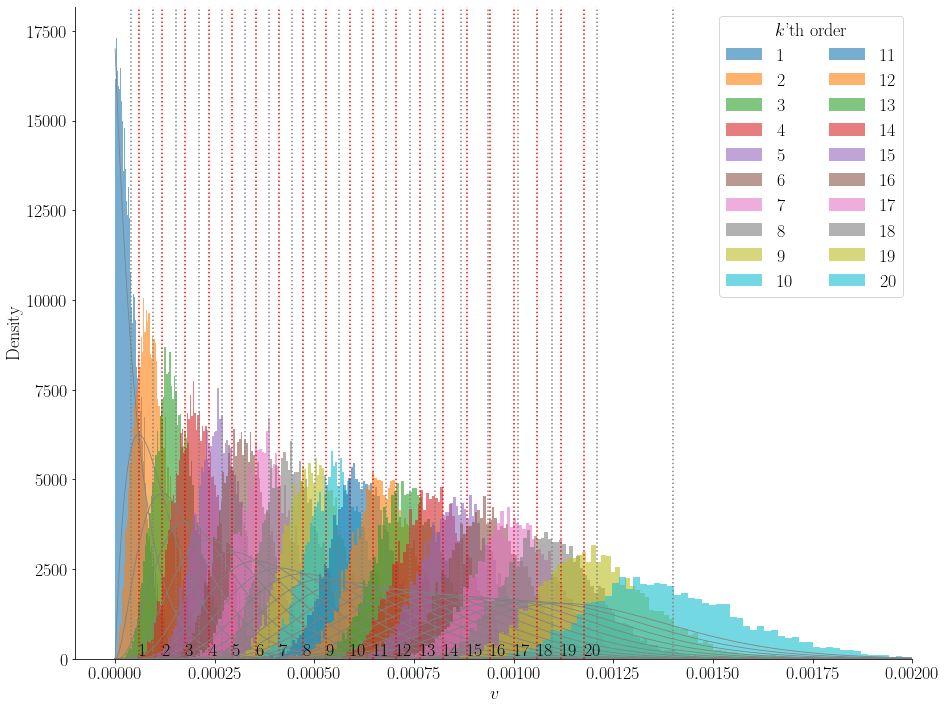

In [189]:
fig, ax = plt.subplots(figsize=[15, 12])
for k in range(K):
    ax.hist(all[:, k], density=True, alpha=0.6, label=f'${k + 1}$', bins=100)
    ax.axvline(all[:, k].mean(), color='gray', linestyle=':')
    ax.axvline((k + 1) / (N + 1), color='red', linestyle=':')
    ax.text((k + 1) / (N + 1), 100, k + 1)
    xs = np.linspace(0, 0.002, 1_000)
    ax.plot(xs, beta.pdf(xs, a=(k + 1), b=N - (k + 1) + 1), color='gray', linestyle='-', linewidth=0.8)
ax.legend(loc='best', title="$k$'th order", ncol=2);
sns.despine()
ax.set_xlabel('$v$');
ax.set_ylabel('Density');
ax.set_xlim(-0.0001, 0.002)